# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load grocery data
df = pd.read_csv('Wholesale_data.csv')

In [3]:
df.shape

(440, 8)

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
# Checking for null values
df.isnull()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
435,False,False,False,False,False,False,False,False
436,False,False,False,False,False,False,False,False
437,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False


In [6]:
# Count nulls per column
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
# Summary statistics
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


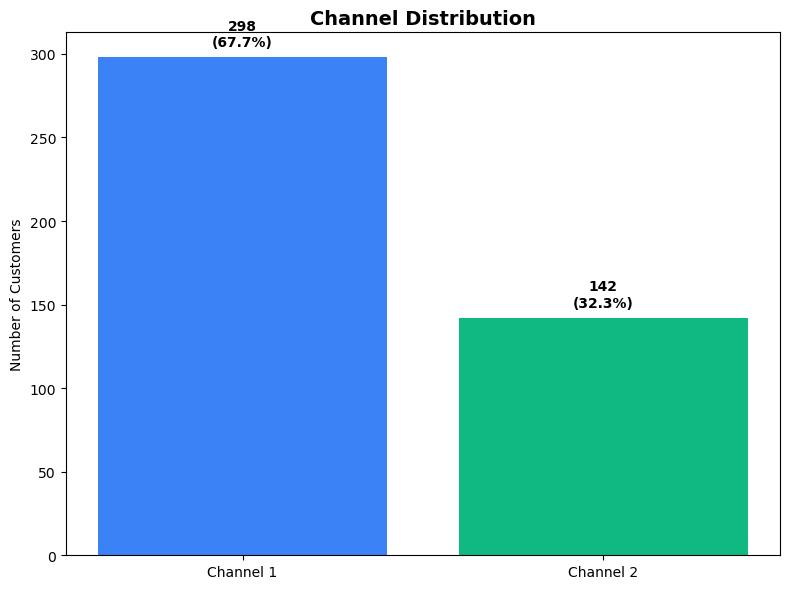

In [22]:
# Channel Distribution Chart
plt.figure(figsize=(8, 6))

# Get channel counts and calculate percentages
channel_counts = df['Channel'].value_counts().sort_index()
channel_labels = [f'Channel {i}' for i in channel_counts.index]
channel_percentages = (channel_counts / len(df) * 100).round(1)

# Create bar chart
bars = plt.bar(channel_labels, channel_counts.values, color=['#3B82F6', '#10B981'])

# Add labels and title
plt.title('Channel Distribution', fontweight='bold', fontsize=14)
plt.ylabel('Number of Customers')

# Add count and percentage labels on top of bars
for i, (bar, pct) in enumerate(zip(bars, channel_percentages)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}\n({pct}%)', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


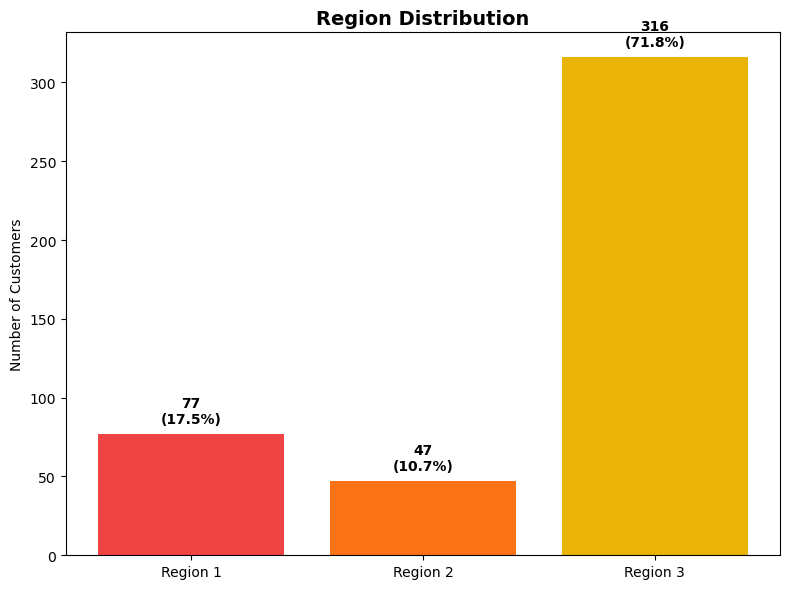

In [23]:
# Region Distribution Chart
plt.figure(figsize=(8, 6))

# Get region counts and calculate percentages
region_counts = df['Region'].value_counts().sort_index()
region_labels = [f'Region {i}' for i in region_counts.index]
region_percentages = (region_counts / len(df) * 100).round(1)

# Create bar chart
bars = plt.bar(region_labels, region_counts.values, color=['#EF4444', '#F97316', '#EAB308'])

# Add labels and title
plt.title('Region Distribution', fontweight='bold', fontsize=14)
plt.ylabel('Number of Customers')

# Add count and percentage labels on top of bars
for i, (bar, pct) in enumerate(zip(bars, region_percentages)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}\n({pct}%)', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

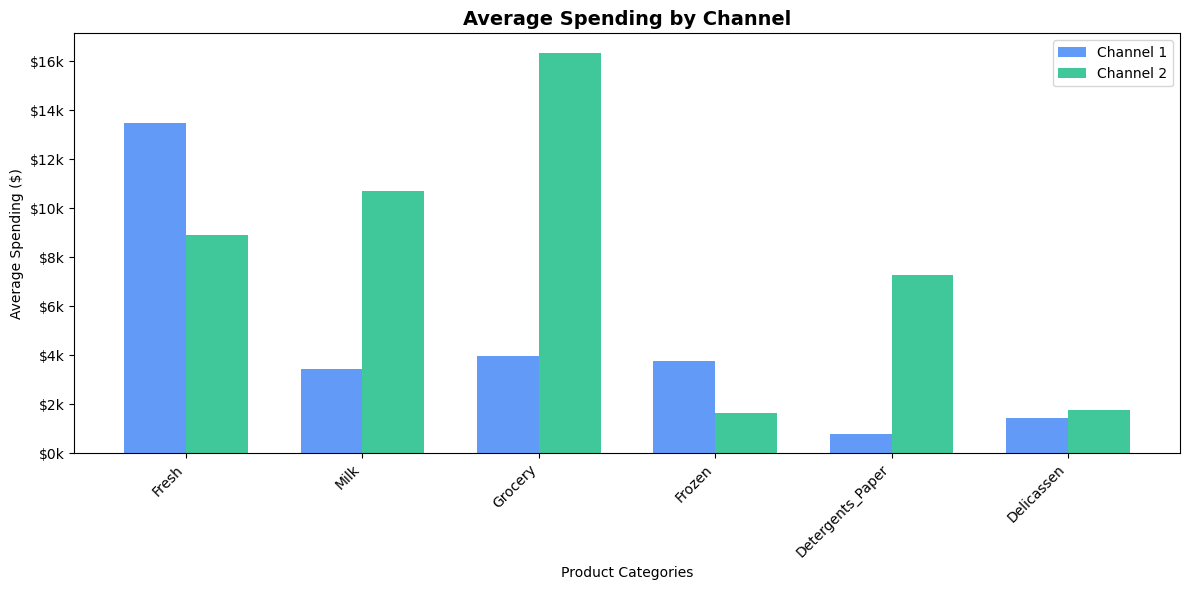

In [24]:
# Average Spending by Channel
plt.figure(figsize=(12, 6))

# Define spending columns
spending_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Calculate average spending by channel
channel1_avg = df[df['Channel'] == 1][spending_cols].mean()
channel2_avg = df[df['Channel'] == 2][spending_cols].mean()

# Set up bar positions
x = np.arange(len(spending_cols))
width = 0.35

# Create bars
bars1 = plt.bar(x - width/2, channel1_avg, width, label='Channel 1', color='#3B82F6', alpha=0.8)
bars2 = plt.bar(x + width/2, channel2_avg, width, label='Channel 2', color='#10B981', alpha=0.8)

# Add labels and title
plt.title('Average Spending by Channel', fontweight='bold', fontsize=14)
plt.ylabel('Average Spending ($)')
plt.xlabel('Product Categories')
plt.xticks(x, spending_cols, rotation=45, ha='right')
plt.legend()

# Format y-axis to show values in thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}k'))

plt.tight_layout()
plt.show()

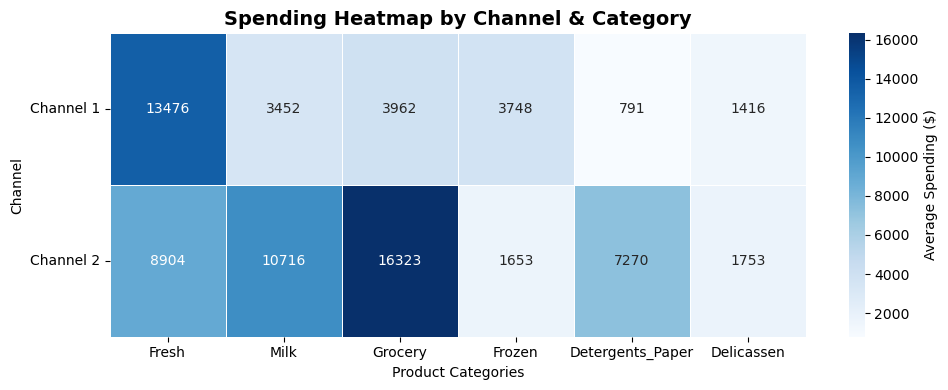

Average Spending by Channel & Category:

Channel 1:
  Fresh          : $  13,476
  Milk           : $   3,452
  Grocery        : $   3,962
  Frozen         : $   3,748
  Detergents_Paper: $     791
  Delicassen     : $   1,416

Channel 2:
  Fresh          : $   8,904
  Milk           : $  10,716
  Grocery        : $  16,323
  Frozen         : $   1,653
  Detergents_Paper: $   7,270
  Delicassen     : $   1,753


In [25]:
plt.figure(figsize=(10, 4))

# Define spending columns
spending_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Calculate average spending by channel
heatmap_data = df.groupby('Channel')[spending_cols].mean()

# Create heatmap
sns.heatmap(heatmap_data, 
            annot=True,                    # Show values in cells
            fmt='.0f',                     # Format as integers
            cmap='Blues',                  # Blue color scheme
            cbar_kws={'label': 'Average Spending ($)'},
            linewidths=0.5)

# Customize labels
plt.title('Spending Heatmap by Channel & Category', fontweight='bold', fontsize=14)
plt.ylabel('Channel')
plt.xlabel('Product Categories')
plt.yticks([0.5, 1.5], ['Channel 1', 'Channel 2'], rotation=0)

plt.tight_layout()
plt.show()

# Print the actual values for reference
print("Average Spending by Channel & Category:")
print("=" * 50)
for channel in sorted(df['Channel'].unique()):
    print(f"\nChannel {channel}:")
    channel_data = df[df['Channel'] == channel]
    for col in spending_cols:
        avg_spending = channel_data[col].mean()
        print(f"  {col:<15}: ${avg_spending:>8,.0f}")

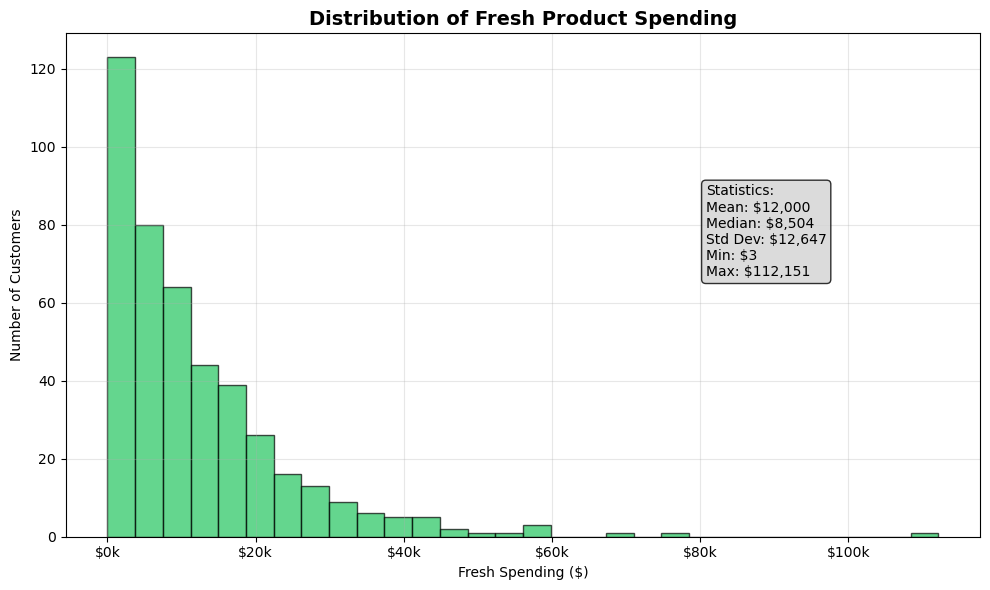

In [29]:
# Fresh Spending Distribution
plt.figure(figsize=(10, 6))

# Create histogram of Fresh spending
plt.hist(df['Fresh'], bins=30, color='#22C55E', alpha=0.7, edgecolor='black')

# Add labels and title
plt.title('Distribution of Fresh Product Spending', fontweight='bold', fontsize=14)
plt.xlabel('Fresh Spending ($)')
plt.ylabel('Number of Customers')

# Format x-axis to show values in thousands
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}k'))

plt.text(0.7, 0.7, stats_text, transform=plt.gca().transAxes, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.8),
         verticalalignment='top', fontsize=10)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



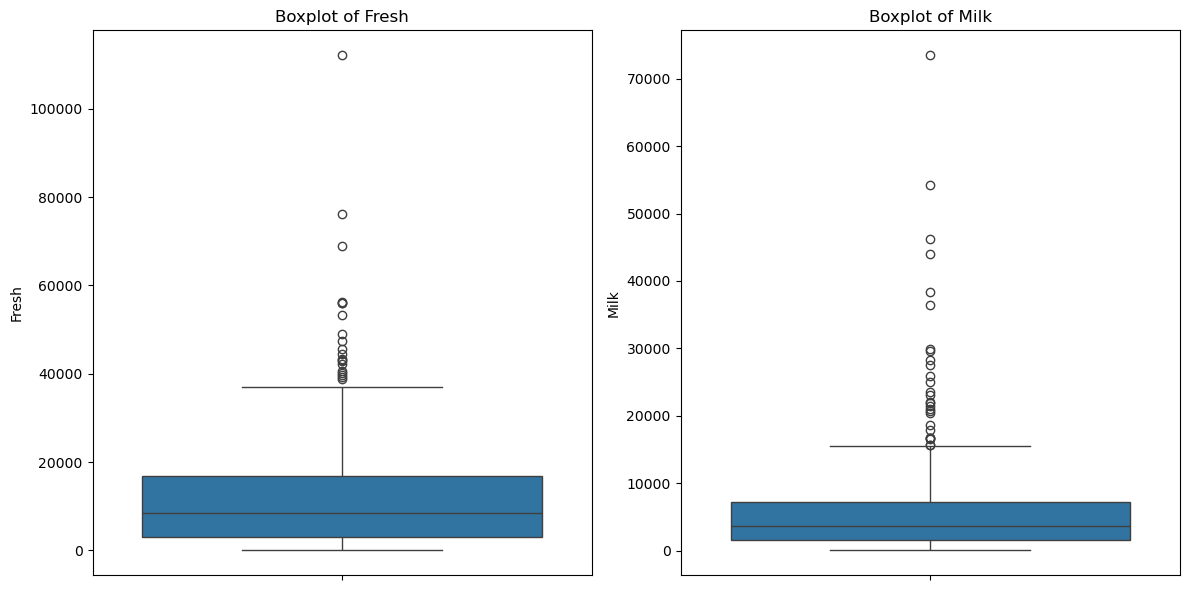

In [12]:
# Look for outliers

features = ['Fresh', 'Milk']  # Add more features as needed
plt.figure(figsize=(12, 6))

for i, feature in enumerate(features):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [17]:
# Create correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

                   Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.062028 -0.169172  0.460720  0.608792 -0.202046   
Region            0.062028  1.000000  0.055287  0.032288  0.007696 -0.021044   
Fresh            -0.169172  0.055287  1.000000  0.100510 -0.011854  0.345881   
Milk              0.460720  0.032288  0.100510  1.000000  0.728335  0.123994   
Grocery           0.608792  0.007696 -0.011854  0.728335  1.000000 -0.040193   
Frozen           -0.202046 -0.021044  0.345881  0.123994 -0.040193  1.000000   
Detergents_Paper  0.636026 -0.001483 -0.101953  0.661816  0.924641 -0.131525   
Delicassen        0.056011  0.045212  0.244690  0.406368  0.205497  0.390947   

                  Detergents_Paper  Delicassen  
Channel                   0.636026    0.056011  
Region                   -0.001483    0.045212  
Fresh                    -0.101953    0.244690  
Milk                      0.661816    0.406368  
Grocery                   0.924641

In [18]:
correlation_value = df['Grocery'].corr(df['Detergents_Paper'])
print(f"Correlation between Grocery and Detergents_Paper: {correlation_value:.2f}")

Correlation between Grocery and Detergents_Paper: 0.92


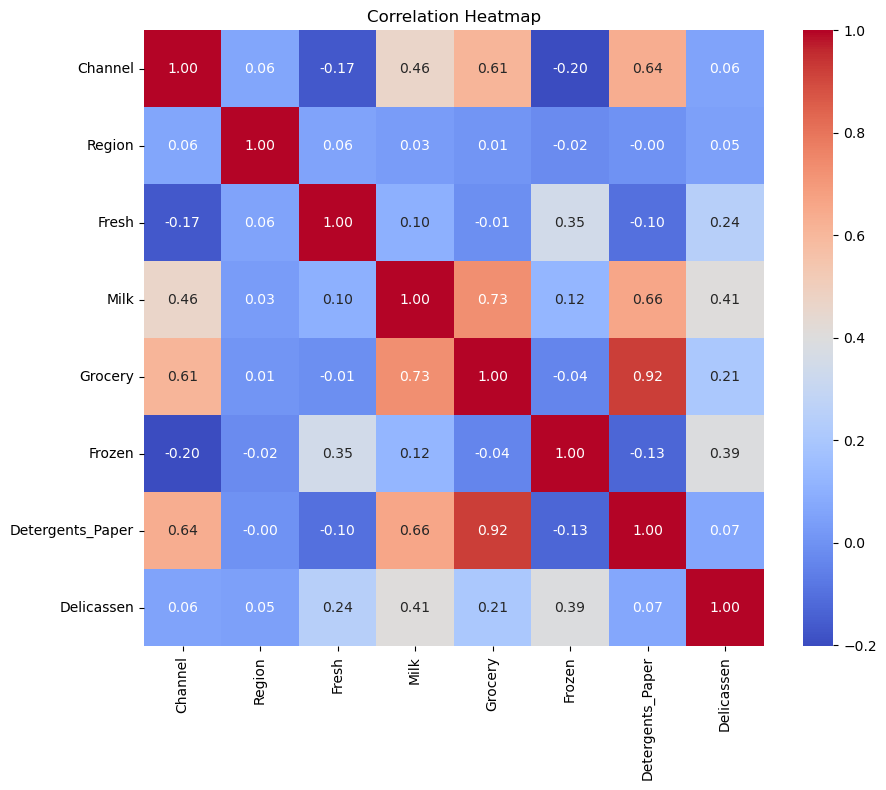

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [16]:
### Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.